<a href="https://colab.research.google.com/github/ForhanShahriarFahim/Artificial-Intelligence-Lab/blob/master/3_Binary_image_classifier_vgg16(Badam_Chola).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Necessary Modules


In [34]:
from google.colab import drive
import os
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import vgg16
from keras.layers import Conv2D, Input, Dense, Activation, MaxPooling2D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing import image

### load file from google drive

In [2]:
drive.mount('/content/drive')
DIRECTORY = '/content/drive/MyDrive/Classifier Dataset/Dataset'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading Data (Badam - 0, Chola - 1)

In [28]:
# Define your directory and categories
DIRECTORY = "/content/drive/MyDrive/Classifier Dataset/Dataset"
CATEGORIES = ["Badam", "Chola"]
# Read and label the data
data = []
for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category)

    for img in os.listdir(folder):
        image = os.path.join(folder, img)
        image_arr = cv2.imread(image)
        image_arr = cv2.resize(image_arr, (256, 256))
        image_arr = cv2.cvtColor(image_arr, cv2.COLOR_BGR2RGB)
        data.append([image_arr, label])

### Data Processing

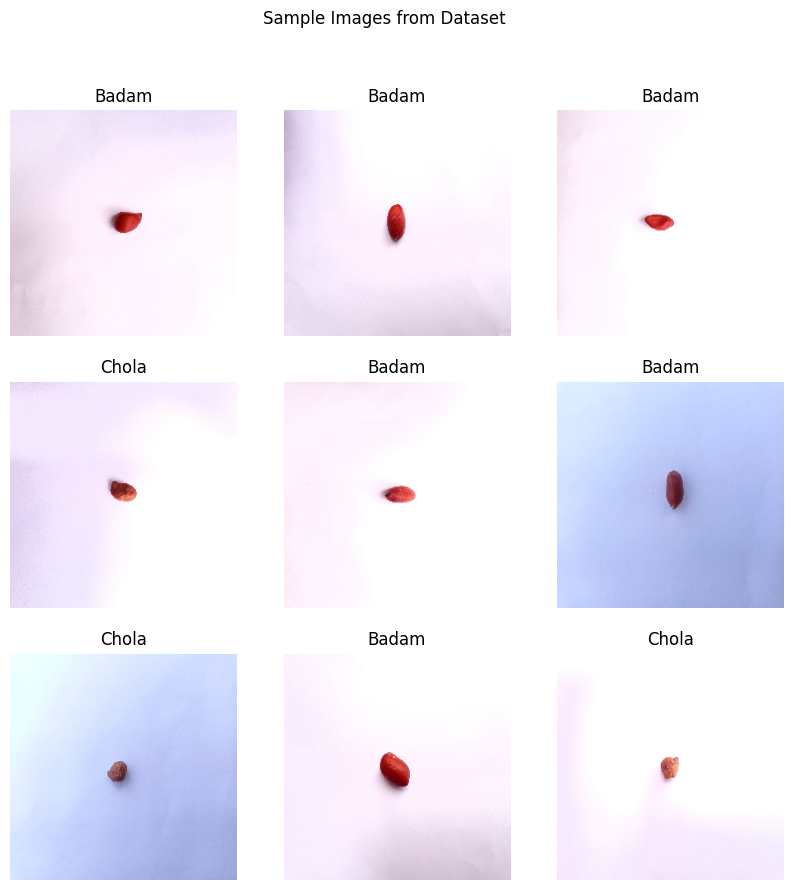

In [29]:
# Shuffle the data
random.shuffle(data)

# Create lists for images and labels
x = []
y = []

# Split data into x (images) and y (labels)
for features, label in data:
    x.append(features)
    y.append(label)

# Convert to numpy arrays
x = np.array(x)
y = np.array(y)


# Function to get class labels
def get_label(label):
    if label == 0:
        return "Badam"
    elif label == 1:
        return "Chola"
    else:
        return "Unknown"


# Display sample images with labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x[i])  # Display the image
    plt.title(get_label(y[i]))  # Display the corresponding label
    plt.axis("off")
plt.suptitle("Sample Images from Dataset")
plt.show()

### Splitting Train and Test & Validation Set

In [30]:
# Normalize the image data
x = x / 255.0

# Split the data into train, validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42
)

print("x_train shape:", x_train.shape)
print("x_val shape:", x_val.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

x_train shape: (763, 256, 256, 3)
x_val shape: (85, 256, 256, 3)
x_test shape: (212, 256, 256, 3)
y_train shape: (763,)
y_val shape: (85,)
y_test shape: (212,)


### Extending Vgg16 architecture for Binary Classification

In [31]:
vgg16_model = tf.keras.applications.VGG16(
    weights='imagenet',  # You can use 'imagenet' to load ImageNet pre-trained weights
    include_top=False,   # Exclude the top (fully connected) layers
    input_shape=(224, 224, 3)  # Specify the input shape of your images
)


model = tf.keras.models.Sequential()
model.add(vgg16_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))

model.layers[0].trainable = False
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(
    learning_rate=0.0001), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_1 (Dropout)         (None, 25088)             0         
                                                                 
 dense_1 (Dense)             (None, 2)                 50178     
                                                                 
Total params: 14764866 (56.32 MB)
Trainable params: 50178 (196.01 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


### Save the model

In [13]:
model_path = '/content/drive/MyDrive/Classifier Dataset/Model Save'
callbacks = keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True)

### Trainning The model with x and y

In [14]:
history = model.fit(x_train,y_train, epochs=10, validation_data=(x_val, y_val), callbacks=callbacks)

Epoch 1/10
24/24 [==============================] - 526s 22s/step - loss: 0.7385 - accuracy: 0.5478 - val_loss: 0.5611 - val_accuracy: 0.7529
Epoch 2/10
24/24 [==============================] - 553s 23s/step - loss: 0.6160 - accuracy: 0.6474 - val_loss: 0.4900 - val_accuracy: 0.8471
Epoch 3/10
24/24 [==============================] - 557s 23s/step - loss: 0.5378 - accuracy: 0.7208 - val_loss: 0.4473 - val_accuracy: 0.8235
Epoch 4/10
24/24 [==============================] - 550s 23s/step - loss: 0.4811 - accuracy: 0.7641 - val_loss: 0.4264 - val_accuracy: 0.8118
Epoch 5/10
24/24 [==============================] - 550s 23s/step - loss: 0.4142 - accuracy: 0.8087 - val_loss: 0.3714 - val_accuracy: 0.8824
Epoch 6/10
24/24 [==============================] - 555s 23s/step - loss: 0.3513 - accuracy: 0.8794 - val_loss: 0.3501 - val_accuracy: 0.8706
Epoch 7/10
24/24 [==============================] - 549s 23s/step - loss: 0.3275 - accuracy: 0.8991 - val_loss: 0.3148 - val_accuracy: 0.8824
Epoch 

In [15]:
#model = keras.models.load_model(model_path)

In [16]:
performance_dict = history.history
print(performance_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### Plotting

Text(0.5, 1.0, 'Train Accuracy vs Validation Accuracy')

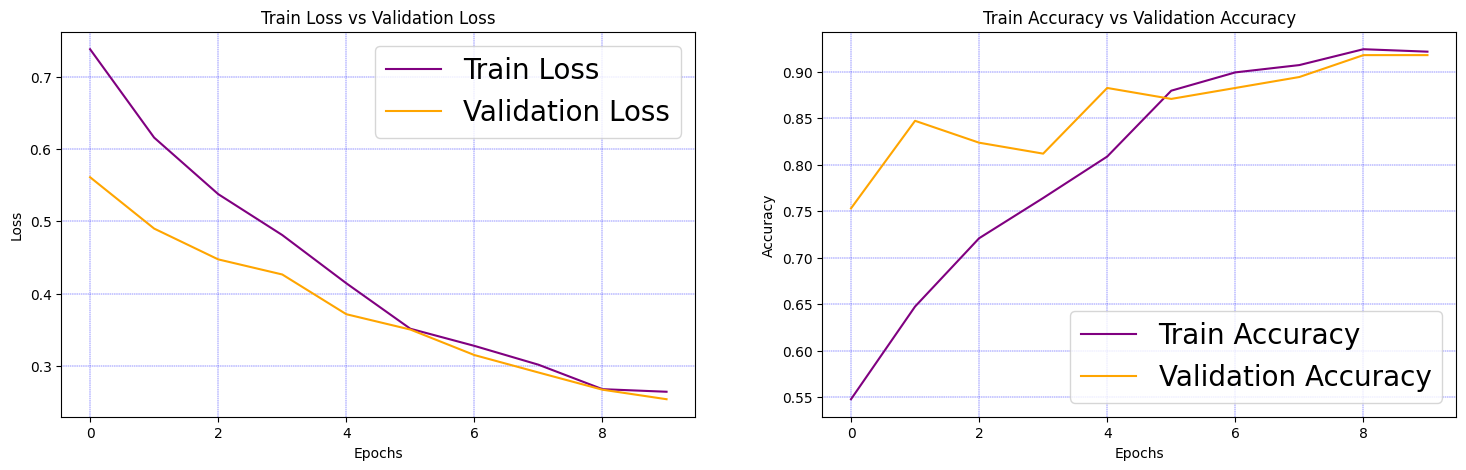

In [17]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.plot(performance_dict ['loss'], color='purple', label='Train Loss')
plt.plot(performance_dict ['val_loss'], color='orange', label='Validation Loss')
plt.legend(loc='upper right', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(color='blue', linewidth=0.3, linestyle='--')
plt.title('Train Loss vs Validation Loss')

plt.subplot(1,2,2)
plt.plot(performance_dict ['accuracy'], color='purple', label='Train Accuracy')
plt.plot(performance_dict ['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(color='blue', linewidth=0.3, linestyle='--')
plt.title('Train Accuracy vs Validation Accuracy')

### Evaluate The Model On Testing set

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest Accuracy:", test_acc)

7/7 [==============================] - 128s 18s/step - loss: 0.2366 - accuracy: 0.9623

Test Accuracy: 0.9622641801834106


### Testing with single image

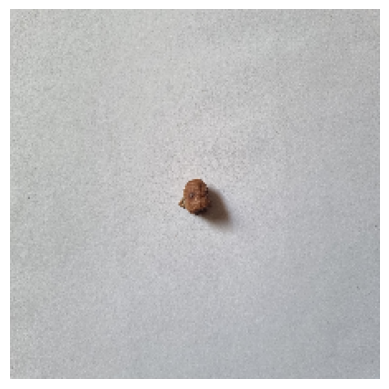

1/1 [==============================] - 1s 559ms/step
[[0.5287582 0.367163 ]]
Prediction: Chola


In [36]:
# Load the image
img_path = "/content/20240224_130749.jpg"  # Replace with the path to your image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Make a prediction
# model = keras.models.load_model("path_to_your_model.h5")  # Load your trained model
prediction = model.predict(img_array)
print(prediction)

# Get the predicted class
predicted_class = "Badam" if prediction[0][0] < 0.5 else "Chola"

# Print the predicted class
print("Prediction:", predicted_class)